In [2]:
# ONLY FOR COLAB!
#import os
#from google.colab import drive, files
#if not os.path.exists('/content/drive'):
#  drive.mount('/content/drive')

In [3]:
#DATA_DIR = './data_colab/yolo-food/'
#if not os.path.exists(DATA_DIR):
#  #files.upload()
#  !unzip /content/drive/MyDrive/Be.ai/yolo-food.zip # to /content/data

In [1]:
#FOR LOCAL
# fix path to dataset at "/Users/evakhromeeva/Library/Application Support/Ultralytics/settings.yaml"
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
DATA_DIR = './FoodSeg103/'

In [2]:
!pip install ultralytics==8.0.196

  Using cached ultralytics-8.0.196-py3-none-any.whl.metadata (31 kB)
Using cached ultralytics-8.0.196-py3-none-any.whl (631 kB)
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.2.97
    Uninstalling ultralytics-8.2.97:
      Successfully uninstalled ultralytics-8.2.97


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

WARNING ⚠️ Ultralytics settings reset to default values. This may be due to a possible problem with your settings or a recent ultralytics package update. 
View settings with 'yolo settings' or at '/Users/evakhromeeva/Library/Application Support/Ultralytics/settings.yaml'
Update settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'.


In [5]:
HOME = os.getcwd()
%cd {HOME}
#!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='yolo-food/images/train/951896_0b2e4483-7925-4b5f-a1b1-c97b3e575f2a.jpg' save=True

/Users/evakhromeeva/Projects/BeYOLOSegmentation


In [5]:
#Image(filename='runs/detect/predict/951896_0b2e4483-7925-4b5f-a1b1-c97b3e575f2a.jpg', height=600)

In [6]:
!yolo task=segment mode=predict model=yolov8n-seg.pt conf=0.25 source='uecfood_256.v2i.yolov8-obb/train/images/1_jpg.rf.62f59f91b3c9be150f30d0e6f20f1a01.jpg' save=True

/opt/anaconda3/envs/yolov8_segmentation/lib/python3.10/site-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_l

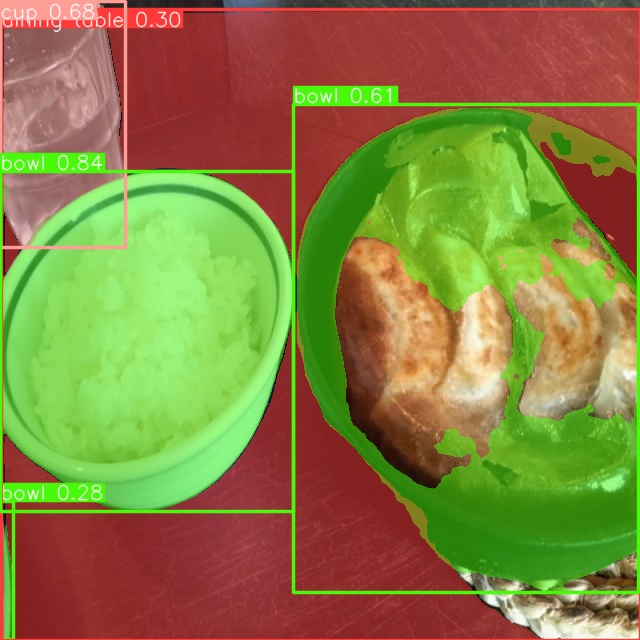

In [7]:
Image(filename='runs/segment/predict7/1_jpg.rf.62f59f91b3c9be150f30d0e6f20f1a01.jpg', height=600)

In [9]:
!yolo segment train data=uecfood_256.v2i.yolov8-obb/data.yaml model=yolov8n-seg.pt epochs=100 imgsz=640

/opt/anaconda3/envs/yolov8_segmentation/lib/python3.10/site-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_l

In [ ]:
!tensorboard --logdir runs/segment/train # view at http://localhost:6006/

In [11]:
!yolo task=segment mode=predict model=runs/segment/train4/weights/best.pt conf=0.25 source='yolo-food/images/train/951896_0c8e78d0-bc83-4c17-b4a9-5c3787ed56d9.jpg' save=True

/opt/anaconda3/envs/yolov8_segmentation/lib/python3.10/site-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_l

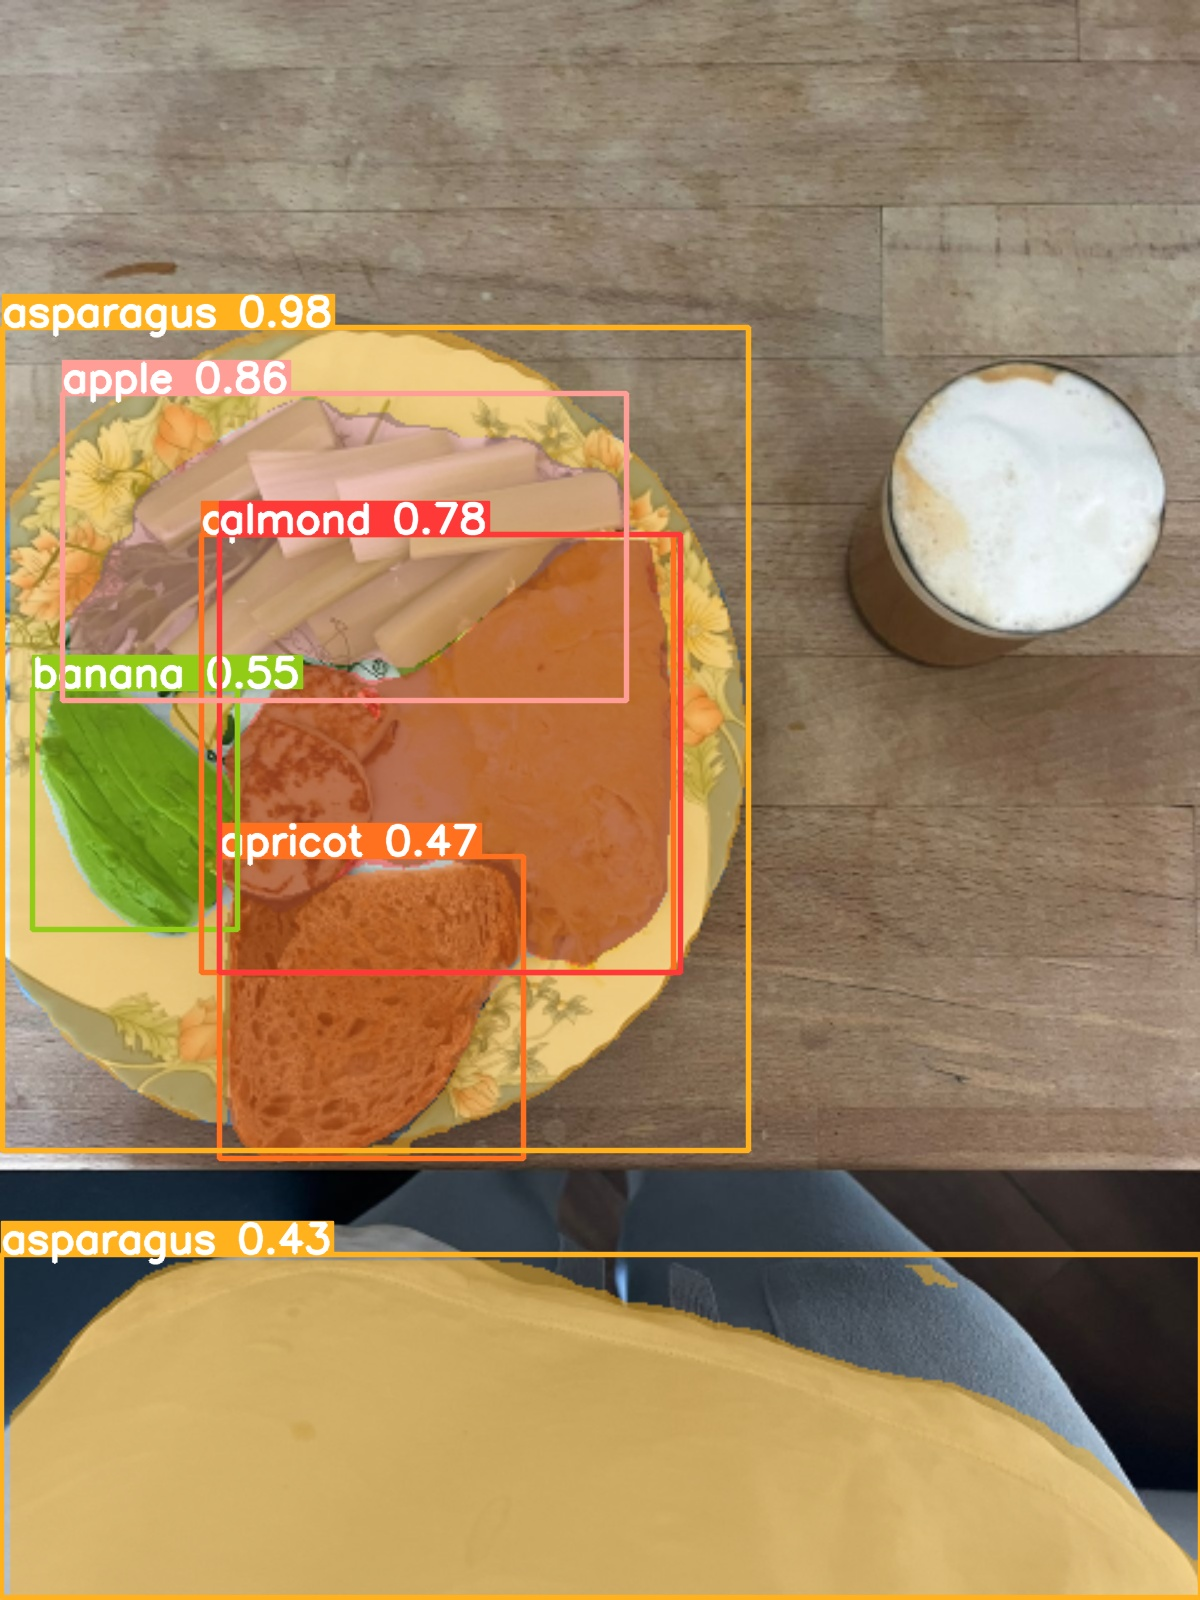

In [12]:
Image(filename='runs/segment/predict5/951896_0c8e78d0-bc83-4c17-b4a9-5c3787ed56d9.jpg', height=600)

In [13]:
!yolo task=segment mode=predict model=runs/segment/train4/weights/best.pt conf=0.25 source='test_meal_img.jpeg' save=True

/opt/anaconda3/envs/yolov8_segmentation/lib/python3.10/site-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_l

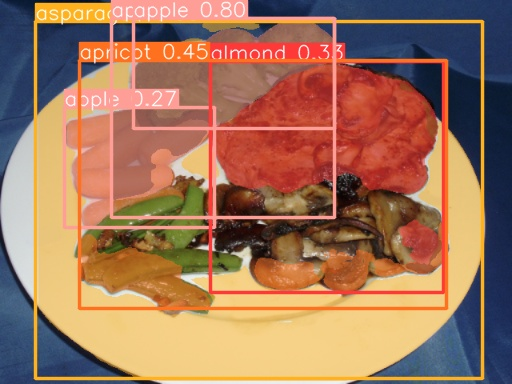

In [14]:
Image(filename='runs/segment/predict6/979574_00000004.jpg', height=600)

In [4]:
from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO("runs/segment/train4/weights/best.pt")

# Export the model to ONNX format
model.export(format="onnx")  # creates 'yolov8n.onnx'

# Load the exported ONNX model
onnx_model = YOLO("runs/segment/train4/weights/best.pt")

# Run inference
results = onnx_model("test_meal_img.jpeg")

/opt/anaconda3/envs/yolov8_segmentation/lib/python3.10/site-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_l

In [5]:
print(results)

[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: ultralytics.engine.results.Masks object
names: {0: 'almond', 1: 'apple', 2: 'apricot', 3: 'asparagus', 4: 'avocado', 5: 'bamboo shoots', 6: 'banana', 7: 'bean sprouts', 8: 'biscuit', 9: 'blueberry', 10: 'bread', 11: 'broccoli', 12: 'cabbage', 13: 'cake', 14: 'candy', 15: 'carrot', 16: 'cashew', 17: 'cauliflower', 18: 'celery stick', 19: 'cheese butter', 20: 'cherry', 21: 'chicken duck', 22: 'chocolate', 23: 'cilantro mint', 24: 'coffee', 25: 'corn', 26: 'crab', 27: 'cucumber', 28: 'date', 29: 'dried cranberries', 30: 'egg', 31: 'eggplant', 32: 'egg tart', 33: 'enoki mushroom', 34: 'fig', 35: 'fish', 36: 'french beans', 37: 'french fries', 38: 'fried meat', 39: 'garlic', 40: 'ginger', 41: 'grape', 42: 'green beans', 43: 'hamburg', 44: 'hanamaki baozi', 45: 'ice cream', 46: 'juice', 47: 'kelp', 48: 'king oyster mushroom', 49: 'kiwi', 50: 'lamb', 51: 'lemon', 